In [109]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

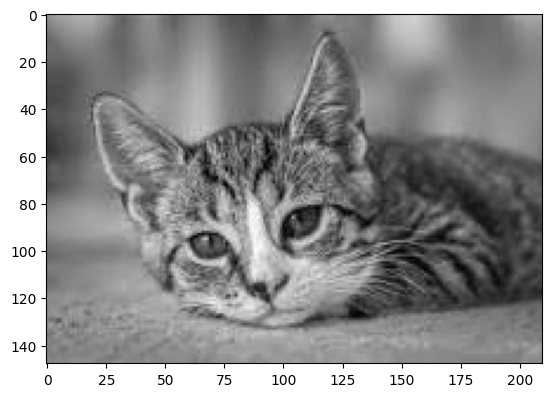

In [110]:
img = cv.imread('/content/download.jfif')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [120]:
def display(og,new,title):
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
  axes[0].imshow(og,cmap='gray')
  axes[0].set_title('ORIGINAL IMAGE')
  axes[0].axis('off')

  axes[1].imshow(new,cmap='gray')
  axes[1].set_title(title)
  axes[1].axis('off')

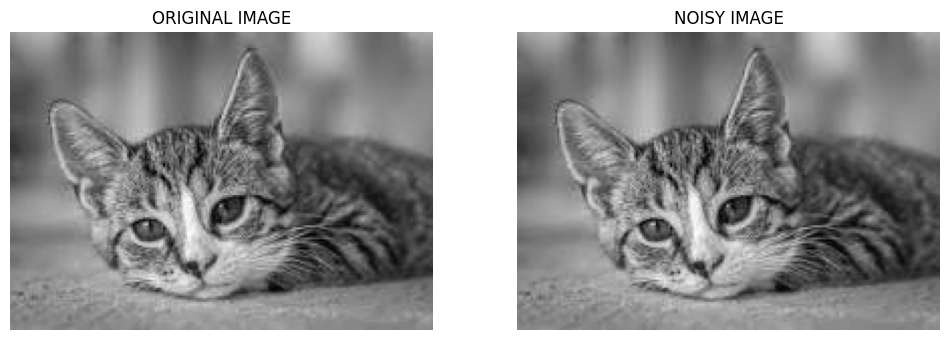

In [122]:
# Adding gaussian noise to the image
rows,columns=gray.shape
noisy_image = np.zeros((rows,columns),dtype="uint8")
mean = 0
std_dev = 20
gray_copy = gray.copy()
gaussian_noise = np.random.normal(mean,std_dev,(rows,columns))
for i in range(rows):
  for j in range(columns):
    gray_copy[i][j] += np.clip(gray_copy[i][j] + gaussian_noise[i][j],0,255)
noisy_image = gray.astype('uint8')

display(gray,noisy_image,'NOISY IMAGE')

In [113]:
# Removing Gaussian Noise using Averaging Filter
def filtered_images(image,mask):
  row,column = gray.shape
  mask_height,mask_width = mask.shape
  filtered_image = np.zeros((row,column))
  for i in range(row-mask_height + 1):
    for j in range(column - mask_width + 1):
        rows = range(i,i+mask_height)
        columns = range(j,j+mask_width)
        part = image[np.ix_(rows,columns)]*mask
        filtered_image[i][j] = part.sum()

  return filtered_image

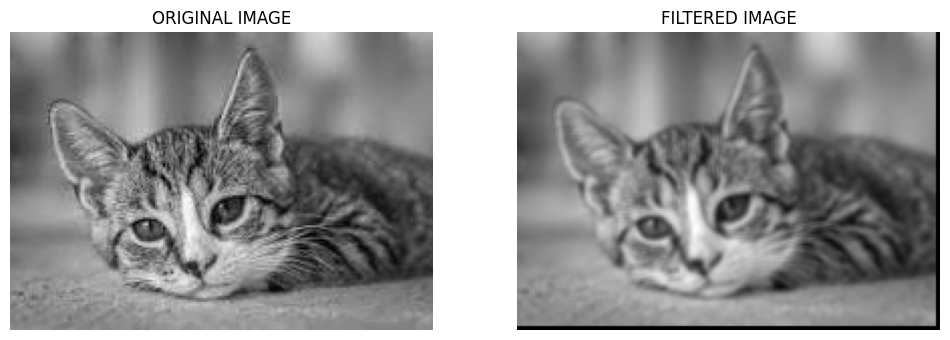

In [123]:
#mask Prepareation
mask_size = 3
mask = np.ones((mask_size, mask_size), dtype="float32") / (mask_size ** 2)

removed_noise = filtered_images(noisy_image,mask)

display(gray,removed_noise,'FILTERED IMAGE')

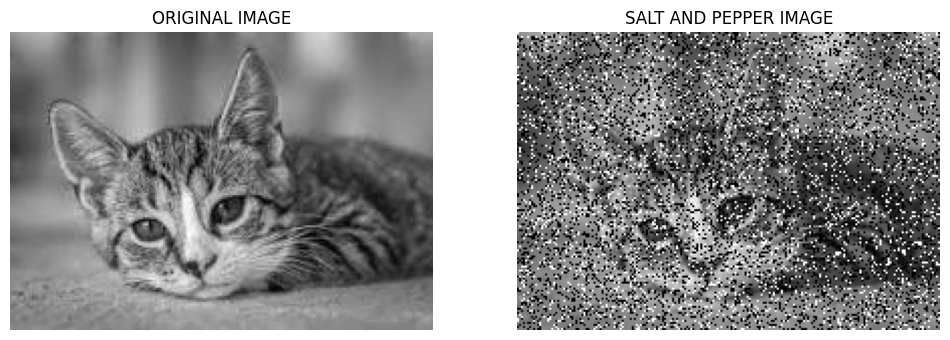

In [124]:
# Adding salt and pepper Noise
def add_noise(image):
    row, column = image.shape

    # Randomly picking pixels and making them white
    number_of_pixels = random.randint(300, 8000)

    for i in range(number_of_pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, column - 1)
        image[y_coord][x_coord] = 255

    # Randomly picking pixels and making them black
    number_of_pixels = random.randint(300, 8000)

    for i in range(number_of_pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, column - 1)
        image[y_coord][x_coord] = 0

    return image
gray_copy = gray.copy()
salt_pepper = add_noise(gray_copy)
display(gray,salt_pepper,'SALT AND PEPPER IMAGE')

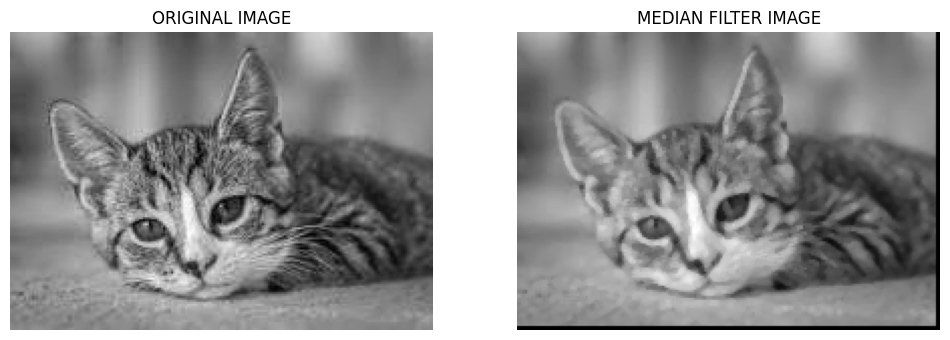

In [125]:
# Removing noise using Median Filtering
def median_filter(image):
    row, column = image.shape

    mh, mw = 3, 3
    new = np.zeros((row, column))

    for i in range(row - mh + 1):
        for j in range(column - mw + 1):
            rows = range(i, i + mh)
            cols = range(j, j + mw)
            part = np.sort(np.ravel(image[np.ix_(rows, cols)]))
            new[i,j] = part[5]

    return new

gray_copy = gray.copy()
median_filter_img = median_filter(gray_copy)
display(gray,median_filter_img,'MEDIAN FILTER IMAGE')